<a href="https://colab.research.google.com/github/esther-pui/WQF7009-Assignment-1/blob/main/00_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1: Exploratory Data Analysis**

## **1: SETUP (Run only once)**

In [17]:
import os

repo_url = "https://github.com/esther-pui/WQF7009-Assignment-1.git"
repo_name = "WQF7009-Assignment-1"

if os.path.exists(repo_name):
    print("Repository exists. Pulling updates...")
    %cd WQF7009-Assignment-1
    !git pull
else:
    print("Repository not found. Cloning...")
    !git clone {repo_url}
    %cd {repo_name}

%cd /content/WQF7009-Assignment-1


Repository not found. Cloning...
Cloning into 'WQF7009-Assignment-1'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 27 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 78.56 KiB | 6.04 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/WQF7009-Assignment-1
/content/WQF7009-Assignment-1


In [16]:
# force delete folder if needed
# !rm -rf WQF7009-Assignment-1

## **2: DATA EXPLORATION (EDA)**

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# load dataset
def load_data():
    df = pd.read_csv("data/healthcare-dataset-stroke-data.csv")

    print(df.shape)
    print(df.info())

    for col in df.columns:
        plt.figure()
        df[col].value_counts().plot(kind='bar')
        plt.title(col)
        plt.show()

    return df

# load_data()

## **3: RUN 00_data_exploration & data cleaning**
Imbalance dataset in stroke plot, stroke = 1 is so much more then stroke = 0

/content/WQF7009-Assignment-1/00_data_exploration.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].median(), inplace=True)


(5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
col:  id


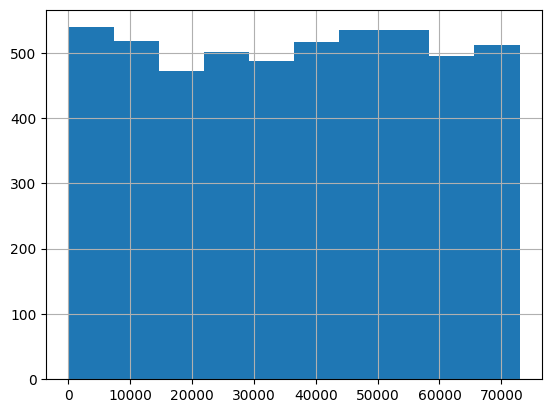

col:  gender


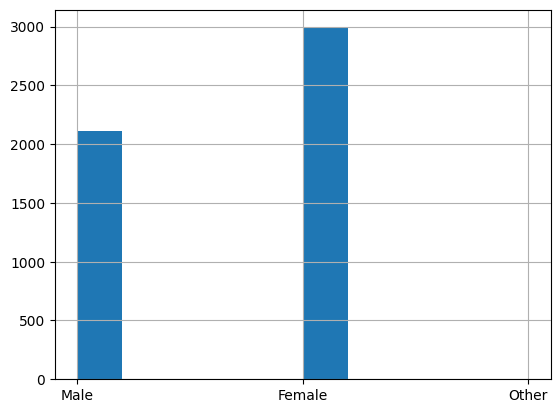

col:  age


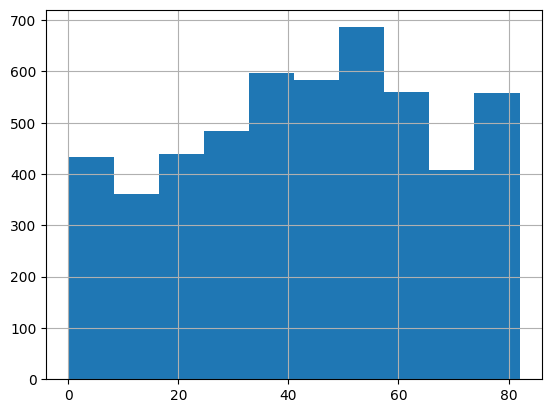

col:  hypertension


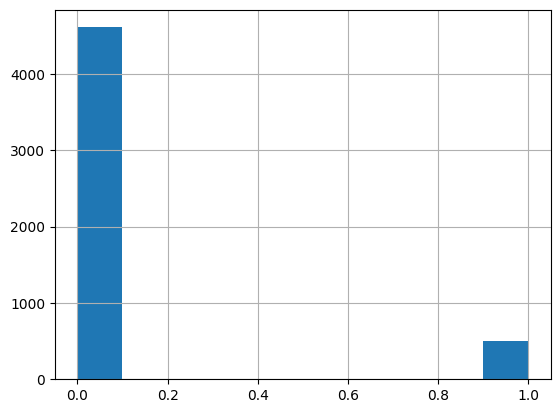

col:  heart_disease


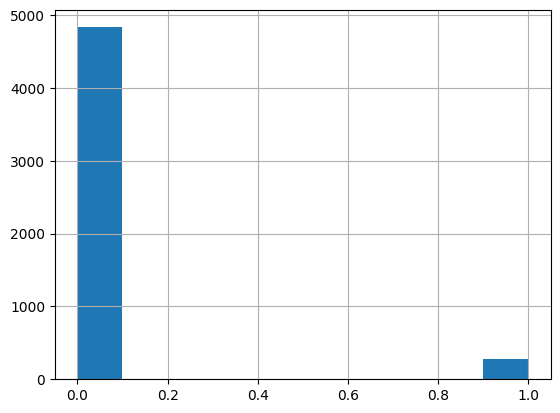

col:  ever_married


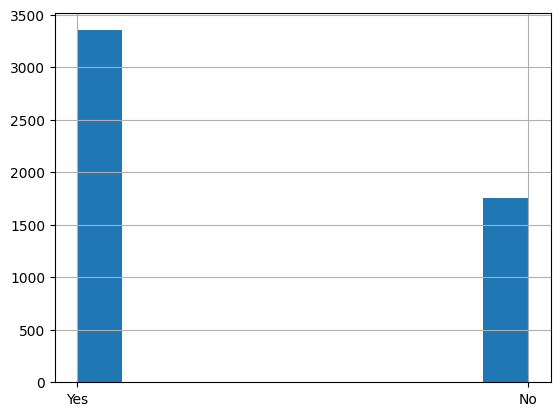

col:  work_type


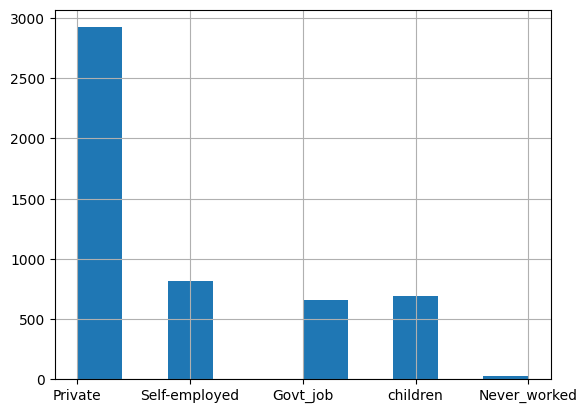

col:  Residence_type


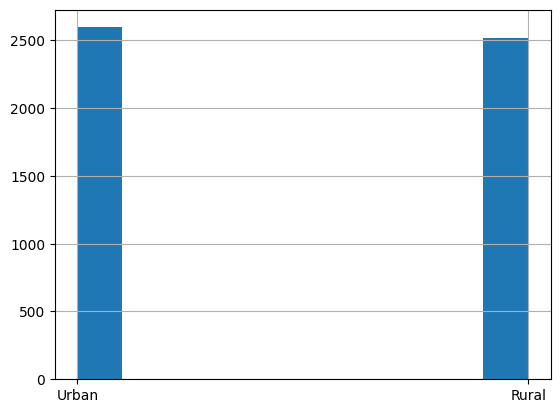

col:  avg_glucose_level


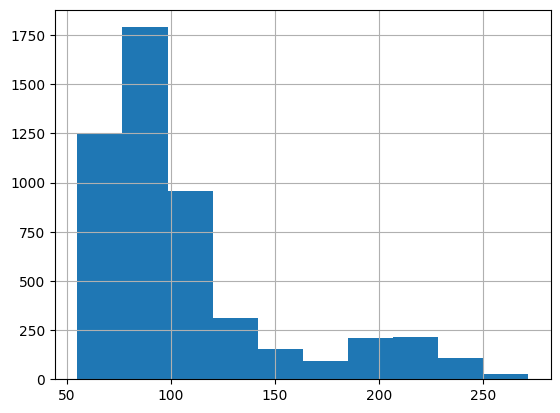

col:  bmi


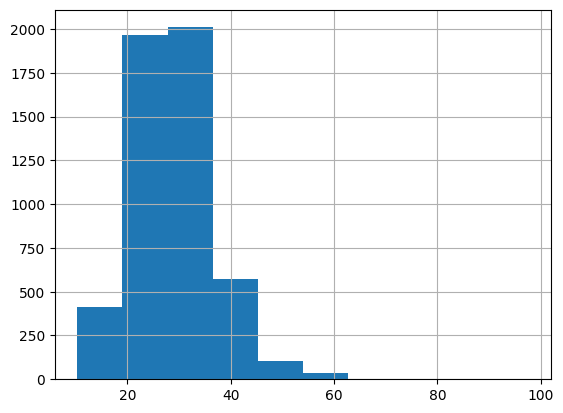

col:  smoking_status


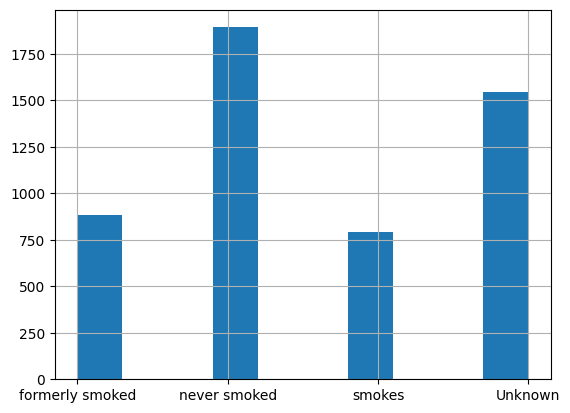

col:  stroke


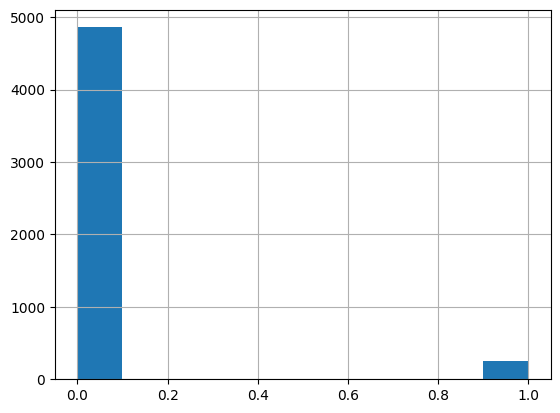

<Figure size 640x480 with 0 Axes>

In [23]:
import matplotlib
matplotlib.use('module://matplotlib_inline.backend_inline')

%run 00_data_exploration.py
# !python 00_data_exploration.py

## **4: Load data for checking**

In [24]:
# %% Show preprocessed dataframe
data_loader.preprocess_data()
data_loader.data.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,67.0,0,1,228.69,36.6,1
1,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,61.0,0,0,202.21,28.1,1
2,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,80.0,0,1,105.92,32.5,1
3,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,49.0,0,0,171.23,34.4,1
4,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,79.0,1,0,174.12,24.0,1


# **Train Model**

In [27]:
from sklearn.ensemble import RandomForestClassifier

# split data
x_train, x_test, y_train, y_test = data_loader.get_data_split()

# fix imbalance
x_train_over, y_train_over = data_loader.oversample(x_train, y_train)

# train
model = RandomForestClassifier(random_state=2021)
model.fit(x_train_over, y_train_over)

print("Model training is complete!")

Model training is complete!
